<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Copy_of_A_Brief_Analysis_of_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
#---------------------------------Etapa 1--------------------------------------
#Importanto bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
#import geopandas as gpd -----> Verificar porque não carrega a biblioteca
import plotly.express as px
import plotly.graph_objects as go

In [197]:
#Importação da biblioteca geopandas via instalação no Colab
!pip install geopandas

In [198]:
#---------------------------------Etapa 2--------------------------------------
#Importando Arquivo CSV

covid_cases = pd.read_csv('worldometer_coronavirus_daily_data.csv')
covid_vaxxs = pd.read_csv('country_vaccinations.csv')

In [199]:
#---------------------------------Etapa 3--------------------------------------
#Vamos marcar o datase e usar como amostra: Brazil, Argentina, Paraguay e Uruguay

def fix_country_name(country):
    name_dict = {
        'BRA': 'Brazil',
        'ARG': 'Argentina',
        'PRY': 'Paraguay',
        'URY': 'Uruguay'
     }
    try:
      return name_dict[country]
    except KeyError:
      return country

covid_cases.country = covid_cases.country.apply(fix_country_name)

In [200]:
#---------------------------------Etapa 4--------------------------------------
#Vamos observar esses 4 países
countries_of_interest = ["Brazil", "Argentina", "Paraguay", "Uruguay"]

#Vamos começar a limpar os dados filtrando-os para o subconjunto de países que desejamos.
covid_cases_subset = covid_cases[covid_cases.country.isin (countries_of_interest)]
covid_vaxxs_subset = covid_vaxxs[covid_vaxxs.country.isin (countries_of_interest)]

In [201]:
#---------------------------------Etapa 5--------------------------------------
#Unindo os databases usando as datas e países
   
merged_data = pd.merge_ordered(covid_cases_subset, covid_vaxxs_subset, \
                               left_on=['date', 'country'], \
                               right_on=['date', 'country'])

#Remove as colunas desnecessárias
merged_data.drop(columns=['iso_code', 'source_name', 'source_website', 'vaccines',\
                           'daily_vaccinations_per_million', 'daily_vaccinations_raw'], inplace=True)

In [202]:
#---------------------------------Etapa 6--------------------------------------
#Vamos lidar com os NaNs
merged_data.fillna({'total_vaccinations':0, 'people_vaccinated':0, 'people_fully_vaccinated':0,\
                 'daily_vaccinations':0,'total_vaccinations_per_hundred':0,\
                 'people_vaccinated_per_hundred':0 ,'people_fully_vaccinated_per_hundred':0}\
                 ,inplace=True)

covid_data = merged_data.dropna(how='any', subset=['cumulative_total_cases'])

In [203]:
#---------------------------------Etapa 7--------------------------------------
#Vamos também definir o índice para a data
covid_data.set_index('date', inplace=True)

In [204]:
#Vamos mudar o índice para um objeto datetime agora
covid_data.index = pd.to_datetime(covid_data.index, errors='coerce', infer_datetime_format=True)

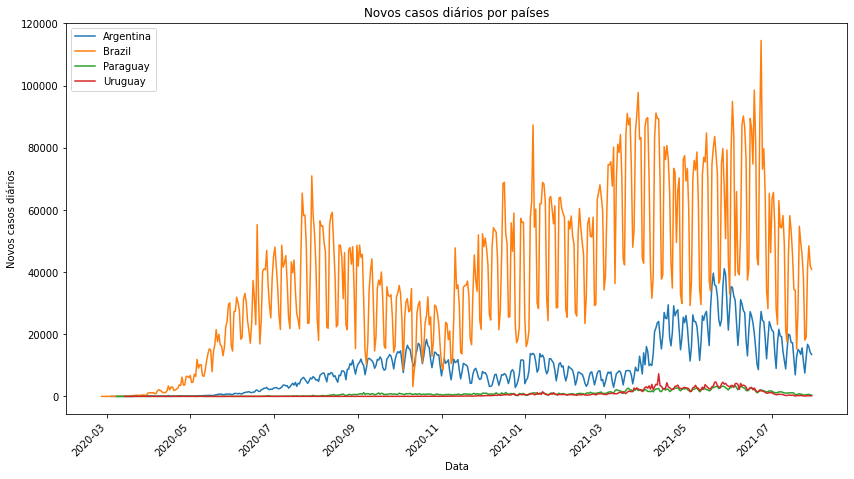

In [205]:
#---------------------------------Etapa 8--------------------------------------
#Dê uma olhada nas taxas de infecção
plt.figure(figsize=(14, 8))
covid_data.groupby('country').daily_new_cases.plot(legend=True,rot=45)

plt.ylabel('Novos casos diários')
plt.xlabel('Data')
plt.title('Novos casos diários por países');

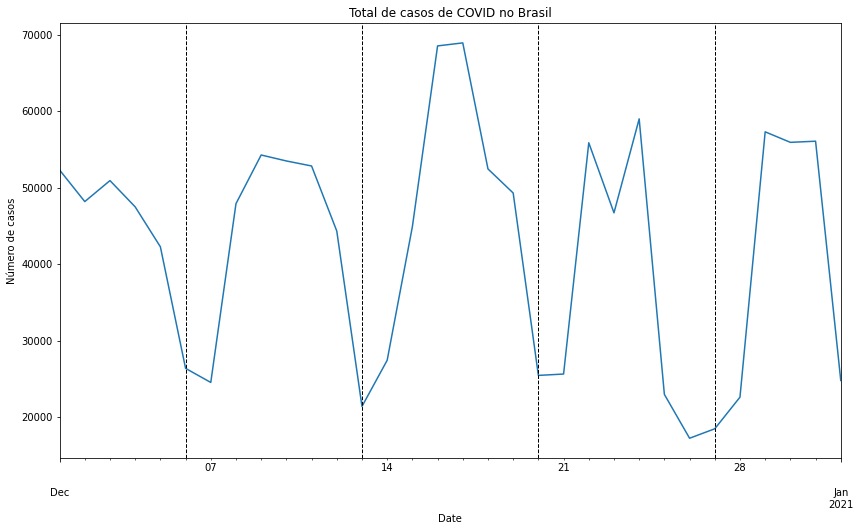

In [206]:
#---------------------------------Etapa 9--------------------------------------
#Agora vamos ampliar o gráfico e observar o padrão.
week_intervals = ['12/6/2020','12/13/2020','12/20/2020','12/27/2020']

plt.figure(figsize=(14, 8))
covid_data[covid_data.country == 'Brazil'] \
  .loc['12/1/2020':'1/1/2021'].daily_new_cases.plot()

{plt.axvline(d, color='k', linestyle='dashed', linewidth=1) for d in week_intervals}

plt.ylabel('Número de casos')
plt.xlabel('Date')
plt.title('Total de casos de COVID no Brasil');

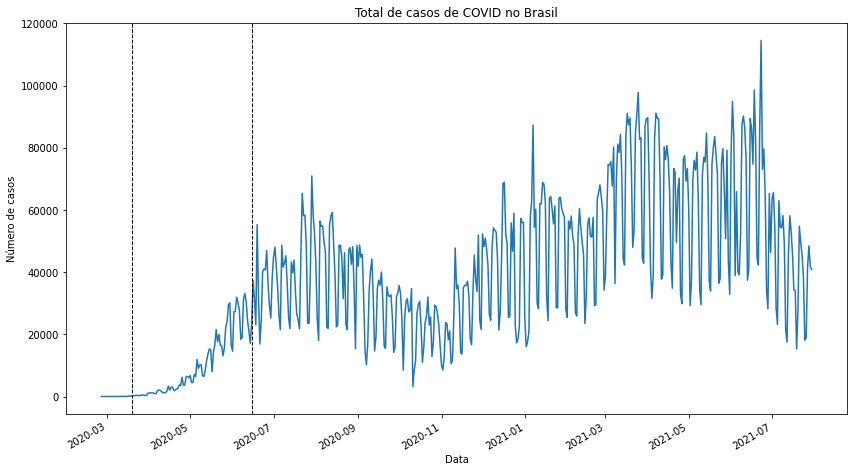

In [207]:
#---------------------------------Etapa 10--------------------------------------
#Os bloqueios ajudaram?
plt.figure(figsize=(14, 8))
covid_data[covid_data.country == 'Brazil'].daily_new_cases.plot()

#Data da primeira etapa de bloqueio (CA)
plt.axvline('3/19/2020', color='k', linestyle='dashed', linewidth=1) 

#Data de reabertura de Nova York
plt.axvline('6/15/2020', color='k', linestyle='dashed', linewidth=1)

plt.ylabel('Número de casos')
plt.xlabel('Data')
plt.title('Total de casos de COVID no Brasil');

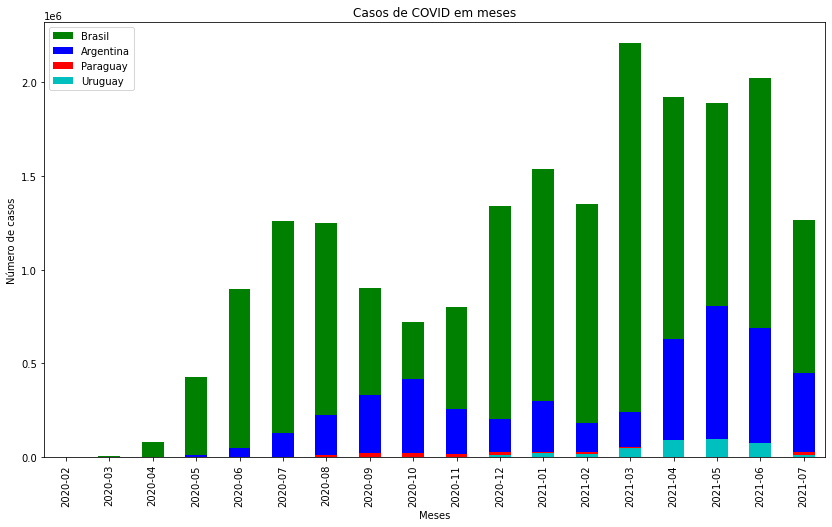

In [208]:
#---------------------------------Etapa 11--------------------------------------
#A época do ano é importante para infecções?
BRA_infections = covid_data[covid_data.country == 'Brazil']
ARG_infections = covid_data[covid_data.country == 'Argentina']
PRY_infections = covid_data[covid_data.country == 'Paraguay']
URY_infections = covid_data[covid_data.country == 'Uruguay']

plt.figure(figsize=(14, 8))
BRA_infections['daily_new_cases']\
  .groupby(BRA_infections.index.to_period('M'))\
  .sum().plot(kind='bar', legend=False, color='g')

ARG_infections['daily_new_cases']\
 .groupby(ARG_infections.index.to_period('M'))\
 .sum().plot(kind='bar', legend=False, color='b')

PRY_infections['daily_new_cases']\
 .groupby(ARG_infections.index.to_period('M'))\
 .sum().plot(kind='bar', legend=False, color='r')

URY_infections['daily_new_cases']\
 .groupby(ARG_infections.index.to_period('M'))\
 .sum().plot(kind='bar', legend=False, color='c')

plt.legend(['Brasil', 'Argentina', 'Paraguay', 'Uruguay'])
plt.ylabel('Número de casos')
plt.xlabel('Meses')
plt.title('Casos de COVID em meses');

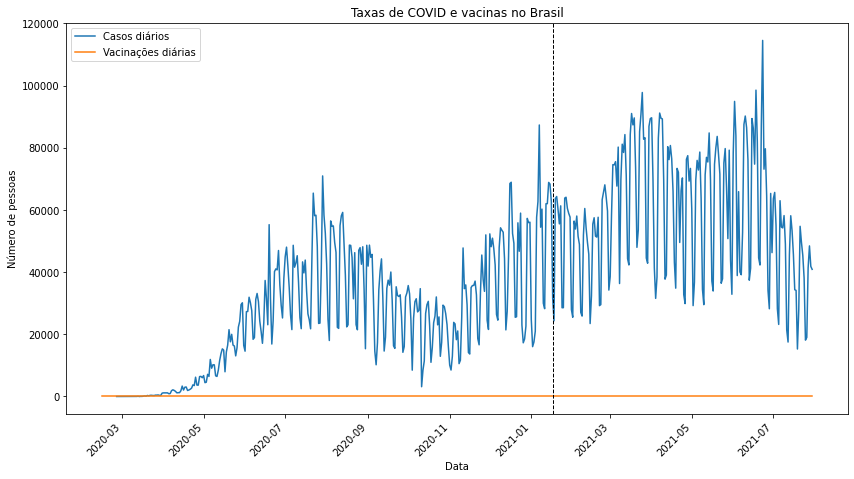

In [209]:
#---------------------------------Etapa 12--------------------------------------
#Veja como o padrão muda de país para país
plt.figure(figsize=(14, 8))
covid_data[covid_data.country == 'Brazil'].daily_new_cases.plot(legend=False,rot=45)
covid_data[covid_data.country == 'Brazil'].daily_vaccinations.plot(legend=False,rot=45)

#Marque o início do lançamento da vacina
plt.axvline('17/01/2021', color='k', linestyle='dashed', linewidth=1)

plt.legend(['Casos diários', 'Vacinações diárias'])
plt.ylabel('Número de pessoas')
plt.xlabel('Data')
plt.title('Taxas de COVID e vacinas no Brasil');